## **FINM 32000 - HW5**

#### Yumeng Zhang (12372205)

I discussed Problem 1 and 2 with Yitong Li.

In [2]:
import numpy as np

# Problem 1

##### **(a)**

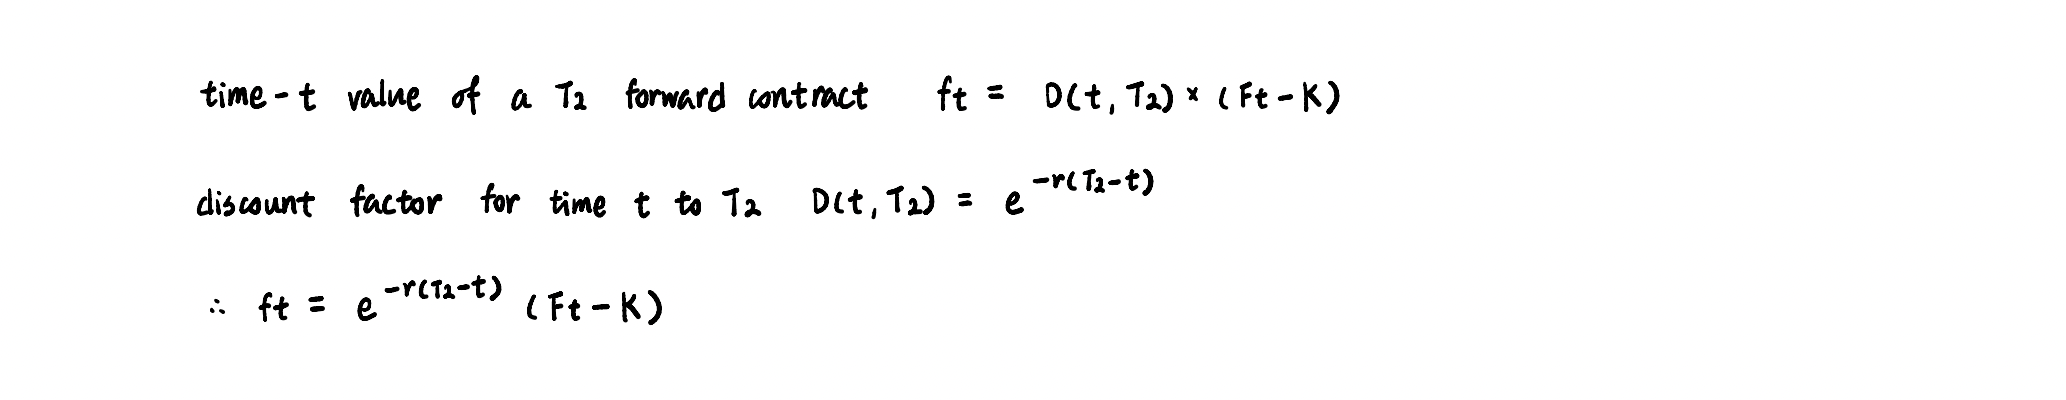

##### **(b)**

The specific arbitrage does not apply to crude oil because unlike a stock, oil is a physical commodity that requires storage costs. This means that the cost of holding crude oil from time t to T2 must be factored into the forward price calculation, and as a result, this premium may prevent the arbitrage strategy from being profitable.

##### **(c)**

In [37]:
# Exponential Ornstein-Uhlenbeck process

class XOU:
    
    def __init__(self, kappa, alpha, sigma, S0, r):
        
        self.kappa = kappa
        self.alpha = alpha
        self.sigma = sigma
        self.S0 = S0
        self.r = r

In [38]:
hw5dynamics=XOU(kappa = 0.472, alpha = 4.4, sigma = 0.368, S0 = 106.9, r = 0.05)

In [39]:
class CallOnForwardPrice:
    
    def __init__(self, K1, T1, T2):
        
        self.K1 = K1
        self.T1 = T1
        self.T2 = T2
        

In [40]:
hw5contract=CallOnForwardPrice(K1 = 103.2, T1 = 0.5, T2 = 0.75)

In [109]:
class MC:
    
    def __init__(self, N, M, epsilon, seed):
        
        self.N = N   # Number of timesteps on each path
        self.M = M   # Number of paths
        self.epsilon = epsilon  # For the dC/dS calculation
        self.rng = np.random.default_rng(seed=seed) # Seeding the random number generator with a specified number helps make the calculations reproducible
    
    def price_call_XOU(self, contract, dynamics):
            
        # You complete the coding of this function
        # self.rng.normal() generates pseudo-random normals

        K1, T1, T2 = contract.K1, contract.T1,  contract.T2
        kappa, alpha, sigma, S0, r = dynamics.kappa, dynamics.alpha ,dynamics.sigma, dynamics.S0, dynamics.r 

        deltat = (T1/self.N)

        Xt = []
        Xt_epsilon = []
        St = []
        St_epsilon = []

        for path in range(self.M):
            
            dBt = np.sqrt(deltat)* self.rng.normal(0, 1, self.N)

            x = np.log(S0)
            x_epsilon = np.log(S0 + self.epsilon)

            for i in range(self.N):
                
                x = x + kappa * (alpha-x) * deltat + sigma * dBt[i]
                x_epsilon =  x_epsilon + kappa * (alpha-x_epsilon) * deltat + sigma * dBt[i]

            Xt.append(x)
            Xt_epsilon.append(x_epsilon)
            St.append(np.exp(x))
            St_epsilon.append(np.exp(x_epsilon))

        Ft = np.exp(np.exp(-kappa*(T2-T1)) *np.log(np.array(St)) + \
             (1- np.exp(-kappa*(T2-T1)))* alpha + (sigma**2/ (4*kappa))*(1- np.exp(-2*kappa*(T2-T1))))  

        Ft_epsilon = np.exp(np.exp(-kappa*(T2-T1)) *np.log(np.array(St_epsilon)) + \
             (1- np.exp(-kappa*(T2-T1)))* alpha + (sigma**2/ (4*kappa))*(1- np.exp(-2*kappa*(T2-T1))))

        Yt = np.maximum(np.exp(-T1*r)*(Ft-K1), 0)
        Yt_epsilon = np.maximum(np.exp(-T1*r)*(Ft_epsilon - K1), 0)

        call_price = Yt.mean()
        
        standard_error = Yt.std()/np.sqrt(self.M)

        call_price_epsilon = Yt_epsilon.mean()
        call_delta = (call_price_epsilon - call_price)/self.epsilon
            
        return(call_price, standard_error, call_delta)


In [110]:
hw5MC = MC(N=100, M=100000, epsilon=0.01, seed=0)
# Change M if necessary

In [111]:
(call_price, standard_error, call_delta) = hw5MC.price_call_XOU(hw5contract,hw5dynamics)

In [112]:
print(call_price, standard_error, call_delta)

7.7322605237329025 0.04210436931892238 0.33959098927276443


Using Monte Carlo simulation, $C(S0)$ is 7.7323. Set number of paths to be 100000, the standard error is 0.0421.

##### **(d)**

Using Monte Carlo simulation, $\frac{\partial C}{\partial S}$ is 0.3396.

##### **(e)**

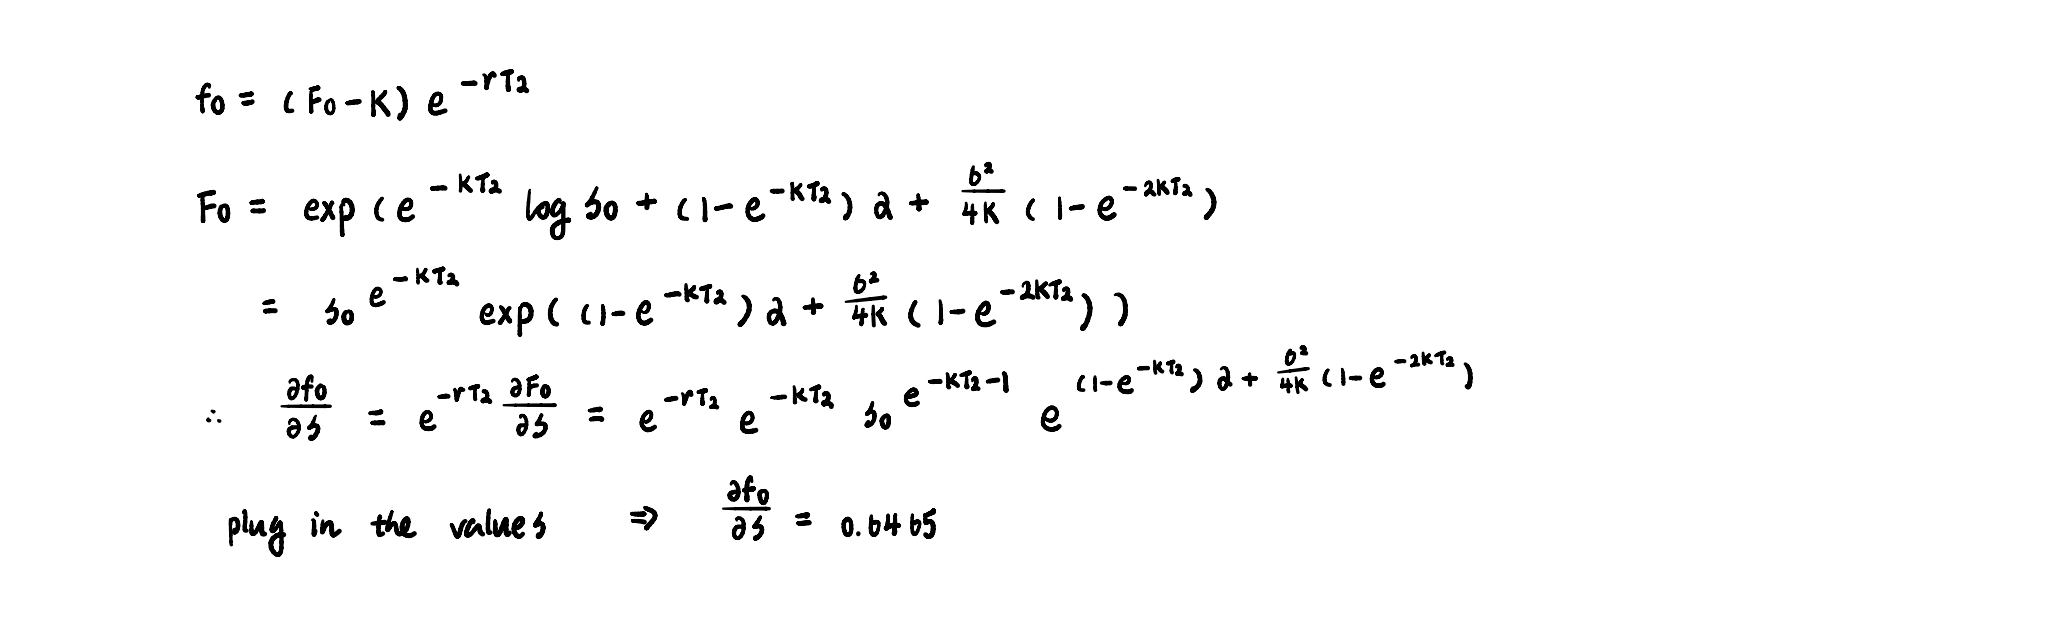

##### **(f)**

In [127]:
contract_num = call_delta/0.6465
print("The hedge portfolio at time 0 should be long " + str(round(contract_num, 4)) + " forward contracts.")

The hedge portfolio at time 0 should be long 0.5253 forward contracts.


##### **(g)**

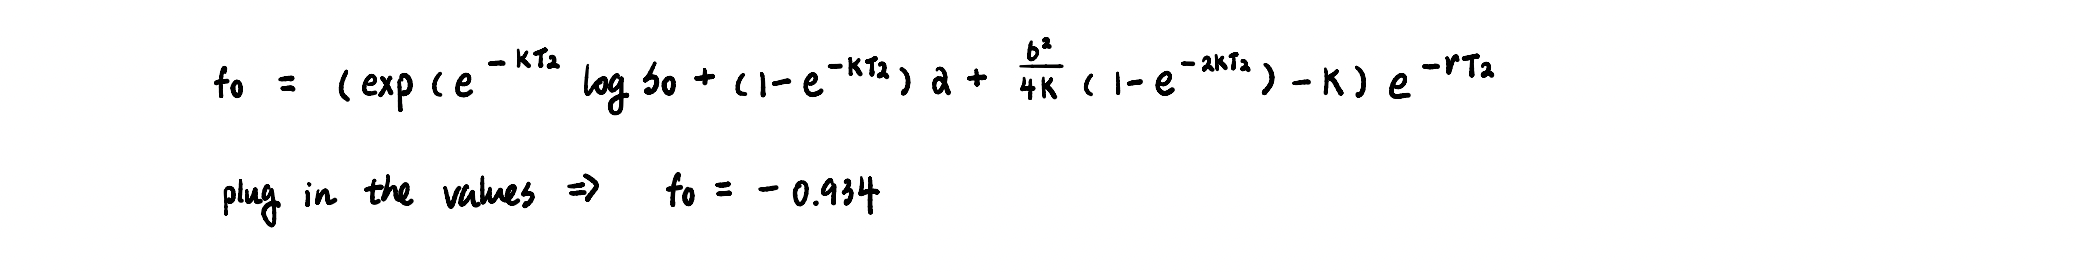

In [128]:
f0 = -0.934
contract_value = f0*4000 + call_price*1000
print("The time-0 value of this contract is " + str(round(contract_value, 4)) + ".")

The time-0 value of this contract is 3996.2605.


# Problem 2

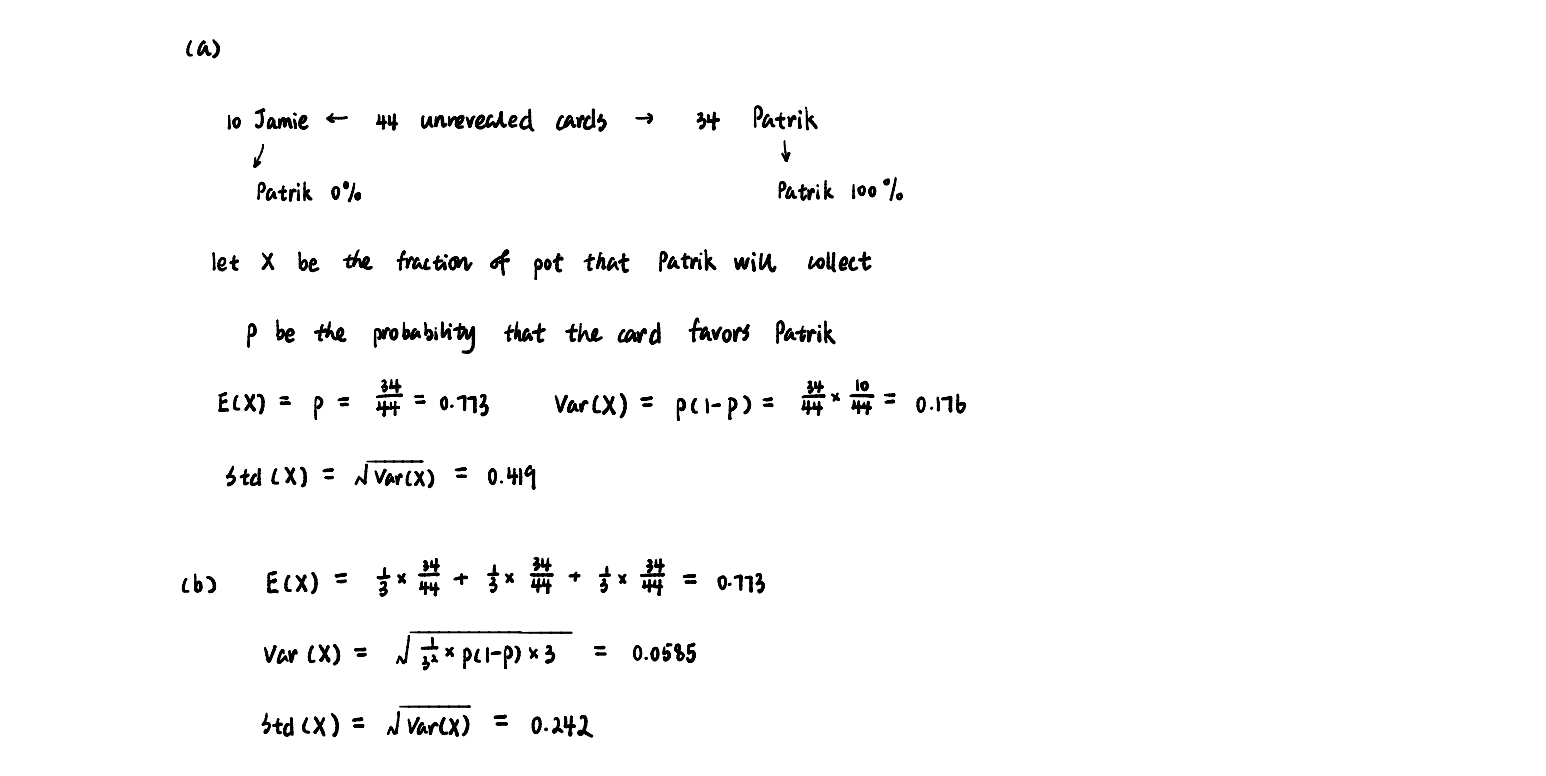

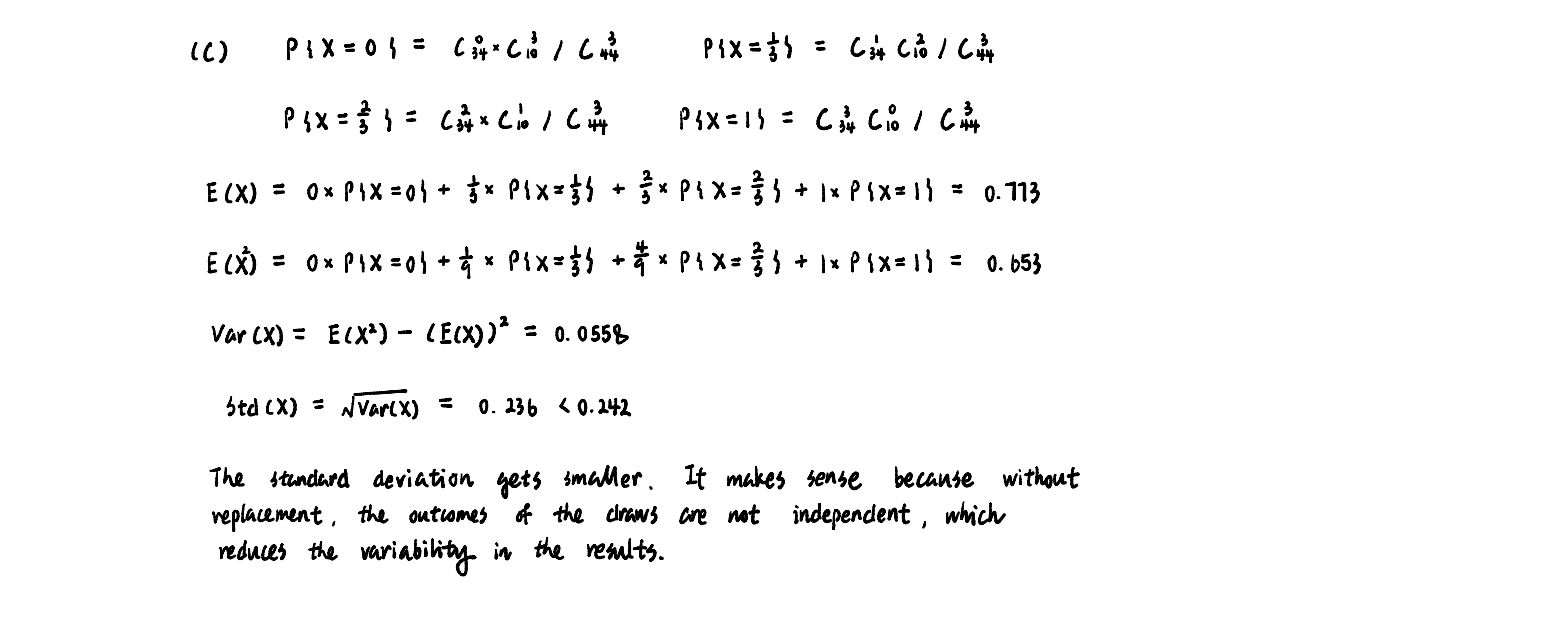